<a href="https://colab.research.google.com/github/naenumtou/ifrs9/blob/main/PD/allCombinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [ ]:
# Import libraries
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
%config InlineBackend.figure_format = 'retina' #Retina display
plt.style.use('seaborn-deep') #Plot style

In [ ]:
# Mock-up data
data = [
        ['GDP_M3', '1', 'GDP'],
        ['HPI_M3_lg2', '1', 'HPI'],
        ['HPI_M6', '2', 'HPI'],
        ['Export_M9', '2', 'Export']
]

In [ ]:
# Get first element of each list
variables = [var[0] for var in data]
variables

['GDP_M3', 'HPI_M3_lg2', 'HPI_M6', 'Export_M9']

In [ ]:
# Simple all combinations
NComb = 2
combinations = [comb for comb in itertools.combinations(variables, NComb)]

# Result
for i in range(len(combinations)):
  print(combinations[i])

('GDP_M3', 'HPI_M3_lg2')
('GDP_M3', 'HPI_M6')
('GDP_M3', 'Export_M9')
('HPI_M3_lg2', 'HPI_M6')
('HPI_M3_lg2', 'Export_M9')
('HPI_M6', 'Export_M9')


In [ ]:
# Define condition combination function
def getCombinations(N, data, curIndex = 0, generatedEL = [], clusterTracker = set(), subGroupTracker = set()):
  if N == 0:
    if generatedEL:
      allPossibleCombinations.append(list(generatedEL))
    return
  if curIndex >= len(data):
    return
  getCombinations(N, data, curIndex + 1, generatedEL, clusterTracker, subGroupTracker)
  if data[curIndex][1] in clusterTracker: #Already taken this cluster
    return
  if data[curIndex][2] in subGroupTracker: #Already taken this sub-group
    return
  generatedEL.append(data[curIndex][0])
  clusterTracker.add(data[curIndex][1])
  subGroupTracker.add(data[curIndex][2])
  getCombinations(N - 1, data, curIndex + 1, generatedEL, clusterTracker, subGroupTracker)  
  generatedEL.pop()
  clusterTracker.remove(data[curIndex][1])
  subGroupTracker.remove(data[curIndex][2])
  return

In [ ]:
# Test function
allPossibleCombinations = []
getCombinations(2, data) #2 Combination

# Result
for i in range(len(allPossibleCombinations)):
  print(allPossibleCombinations[i])

['HPI_M3_lg2', 'Export_M9']
['GDP_M3', 'Export_M9']
['GDP_M3', 'HPI_M6']


In [ ]:
# Import dataset from cluster analysis
df = pd.read_csv(
    'https://raw.githubusercontent.com/naenumtou/ifrs9/main/PD/datasets/clusterVarClusResult.csv'
)

# Show table
df

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,Correlation,Group,RSRatioRank,correlationRank,select
0,1,GDP_C_lg12,0.871101,0.497752,0.256645,0.808461,GDP,1.0,1.0,1
1,1,MPI_C_lg12,0.858329,0.471213,0.267916,0.795060,MPI,1.0,1.0,1
2,1,RSI_C_lg12,0.775689,0.668334,0.676318,0.657134,RSI,1.0,1.0,1
3,1,PCI_C_lg12,0.668555,0.406091,0.558073,0.615780,PCI,1.0,1.0,1
4,2,CPI_M9_lg6,0.997148,0.160277,0.003397,0.520188,CPI,1.0,1.0,1
5,3,PII_M12_lg11,0.956529,0.514600,0.089557,0.615274,PII,2.0,1.0,1
6,3,OP_C,0.888969,0.518083,0.230395,0.612120,OP,3.0,1.0,1
7,3,PII_M12_lg10,0.965545,0.605838,0.087412,0.589314,PII,1.0,3.0,1
8,3,OP_C_lg1,0.925313,0.462996,0.139080,0.566471,OP,1.0,2.0,1
9,4,API_C_lg8,0.954485,0.147321,0.053379,0.548191,API,1.0,1.0,1


In [ ]:
# Convert to list with rearrange position
dfList = df[['Variable', 'Cluster', 'Group']].values.tolist()
dfList[:5]

[['GDP_C_lg12', 1, 'GDP'],
 ['MPI_C_lg12', 1, 'MPI'],
 ['RSI_C_lg12', 1, 'RSI'],
 ['PCI_C_lg12', 1, 'PCI'],
 ['CPI_M9_lg6', 2, 'CPI']]

In [ ]:
# Call function
nComb = 3 #Maximum of 3 combinations
allPossibleCombinations = []

for n in range(1, nComb + 1):
  getCombinations(n, dfList)

# Result
print(allPossibleCombinations[-3:])

[['GDP_C_lg12', 'CPI_M9_lg6', 'PII_M12_lg10'], ['GDP_C_lg12', 'CPI_M9_lg6', 'OP_C'], ['GDP_C_lg12', 'CPI_M9_lg6', 'PII_M12_lg11']]


In [ ]:
# To DataFrame
result = pd.DataFrame(
    allPossibleCombinations,
    columns = [f'Var{i}' for i in range(1, nComb + 1)]
)
result['N'] = result.count(axis = 1) #Count number of combinations
result.head(5)

,Var1,Var2,Var3,N
0,Wage_C_lg9,None,None,1
1,PIR_C_lg12,None,None,1
2,MPI_C_lg9,None,None,1
3,RSI_C_lg10,None,None,1
4,GDP_C_lg9,None,None,1


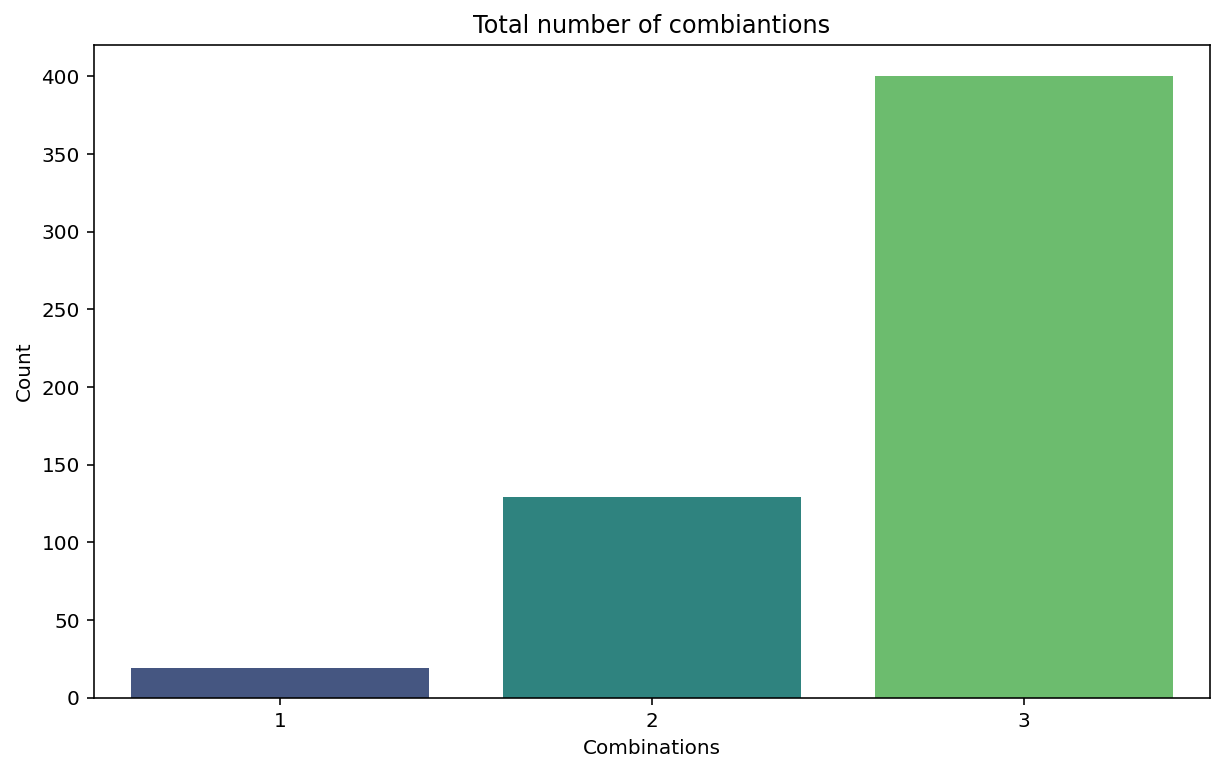

In [ ]:
# Plot
plt.figure(figsize = (10, 6))
plt.title('Total number of combiantions')
sns.countplot(
    x = 'N',
    data = result,
    palette = 'viridis'
)
plt.xlabel('Combinations')
plt.ylabel('Count')
plt.show()